In [8]:
import pandas as pd
import re


In [9]:
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv('varyreplayseq.csv', index_col="Task")
data1 = pd.read_csv('varyreplayseq1.csv', index_col="Task")

# Delete columns except 'Task' and those ending in 'Test Acc'
columns_to_keep = [col for col in data.columns if col.endswith('Test Acc') and "divnum300" not in col]
columns_to_keep1 = [col for col in data1.columns if col.endswith('Test Acc') and "divnum300" not in col]

filtered_data = data[columns_to_keep]
filtered_data1 = data1[columns_to_keep1]
filtered_data = pd.concat([filtered_data, filtered_data1], axis=1)
filtered_data.head()

,VaryReplaySeq-pretrained0-byclass1-hard2ez1-seed1000 - Test Acc,VaryReplaySeq-pretrained0-byclass1-hard2ez1-seed100 - Test Acc,VaryReplaySeq-pretrained0-byclass1-hard2ez1-seed10 - Test Acc,VaryReplaySeq-pretrained0-byclass1-hard2ez1-seed1 - Test Acc,VaryReplaySeq-pretrained0-byclass1-hard2ez0-seed1000 - Test Acc,VaryReplaySeq-pretrained0-byclass1-hard2ez0-seed100 - Test Acc,VaryReplaySeq-pretrained0-byclass1-hard2ez0-seed10 - Test Acc,VaryReplaySeq-pretrained0-byclass1-hard2ez0-seed1 - Test Acc,VaryReplaySeq-pretrained0-byclass0-hard2ez1-seed1000 - Test Acc,VaryReplaySeq-pretrained0-byclass0-hard2ez1-seed100 - Test Acc,...,VaryReplaySeq-divnum1-pretrained1-byclass0-hard2ez1-seed10 - Test Acc,VaryReplaySeq-divnum1-pretrained1-byclass0-hard2ez1-seed1 - Test Acc,VaryReplaySeq-divnum1-pretrained1-byclass0-hard2ez0-seed1000 - Test Acc,VaryReplaySeq-divnum1-pretrained1-byclass0-hard2ez0-seed100 - Test Acc,VaryReplaySeq-divnum1-pretrained1-byclass0-hard2ez0-seed10 - Test Acc,VaryReplaySeq-divnum1-pretrained1-byclass0-hard2ez0-seed1 - Test Acc,VaryReplaySeq-divnum1-pretrained0-byclass0-hard2ez0-seed1000 - Test Acc,VaryReplaySeq-divnum1-pretrained0-byclass0-hard2ez0-seed100 - Test Acc,VaryReplaySeq-divnum1-pretrained0-byclass0-hard2ez0-seed10 - Test Acc,VaryReplaySeq-divnum1-pretrained0-byclass0-hard2ez0-seed1 - Test Acc
Task,,,,,,,,,,,,,,,,,,,,,
1,0.89400,0.89000,0.88000,0.91000,0.87000,0.90600,0.88600,0.88200,0.88800,0.90000,...,0.89400,0.91800,0.89800,0.90600,0.89600,0.92400,0.88400,0.90400,0.90000,0.89600
2,0.49800,0.52400,0.50700,0.52000,0.52100,0.50300,0.54700,0.49200,0.69400,0.69100,...,0.73400,0.73600,0.72100,0.71200,0.74000,0.73100,0.71300,0.69000,0.68700,0.70700
3,0.40800,0.41200,0.39400,0.41200,0.39067,0.41200,0.38867,0.38733,0.57733,0.59467,...,0.65200,0.66400,0.64667,0.65600,0.63800,0.66800,0.61000,0.60400,0.60067,0.61400
4,0.35750,0.38400,0.37300,0.38400,0.34200,0.35950,0.38050,0.35650,0.54650,0.56000,...,0.61200,0.59450,0.60950,0.62050,0.60950,0.59950,0.56850,0.55850,0.57200,0.56500
5,0.26720,0.30720,0.29600,0.32120,0.30640,0.26200,0.30200,0.27760,0.48200,0.49440,...,0.53040,0.51960,0.54280,0.54760,0.52720,0.54960,0.48160,0.50160,0.51440,0.49720


In [10]:
import pandas as pd
import numpy as np
# Assuming you already have the filtered_data DataFrame

# Calculate the row-wise mean
row_mean = filtered_data.select_dtypes(include=[np.number]).mean(axis=0)

# Convert the row-wise mean into a Series
series_data = pd.Series(row_mean, index=filtered_data.columns)
series_data = series_data.rename(index=lambda x: x.replace("VaryReplaySeq-p", "VaryReplaySeq-divnum1-p"))
series_data = series_data.sort_index()
series_data = series_data*100

# Set the display options for pandas
pd.set_option('display.float_format', '{:.5f}'.format)
# Print the nicely formatted Series
print(len(series_data))


64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
# Load the CSV file into a DataFrame
data1 = pd.read_csv('varyreplayseqforget.csv', index_col="Task")
# data1 = pd.read_csv('varyreplayseq1.csv', index_col="Task")

# Delete columns except 'Task' and those ending in 'Test Acc'
columns_to_keep1 = [col for col in data1.columns if col.endswith('Test Acc') and "divnum300" not in col]
# columns_to_keep1 = [col for col in data1.columns if col.endswith('Test Acc') and "divnum300" not in col]

filtered_data1 = data1[columns_to_keep1]
# filtered_data1 = data1[columns_to_keep1]
# filtered_data = pd.concat([filtered_data, filtered_data1], axis=1)
for column in filtered_data1.columns:
    first_value1 = filtered_data1[column].iloc[0]
    filtered_data1.loc[:, column] = (first_value1 - filtered_data1[column]) / first_value1
# Assuming you already have the filtered_data DataFrame

# Calculate the row-wise mean
row_mean1 = filtered_data1.iloc[1:21].select_dtypes(include=[np.number]).mean(axis=0)

# Convert the row-wise mean into a Series
series_data1 = pd.Series(row_mean1, index=filtered_data1.columns)
series_data1 = series_data1.rename(index=lambda x: x.replace("VaryReplaySeq-p", "VaryReplaySeq-divnum1-p"))
series_data1 = series_data1.sort_index()
series_data1 = series_data1*100


# Assuming you already have the series_data Series

# Convert the Series to a DataFrame
df1 = series_data1.to_frame(name='Test Acc')

# Extract the common prefix before the seed
prefixes1 = []
for index in df1.index:
    prefix = index.split('-seed')[0].strip()
    prefixes1.append(prefix)

# Add the prefixes as a new column in the DataFrame
df1['Prefix'] = prefixes1

# with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):  # more options can be specified also
#     display(df)

# Extract unique prefixes
unique_prefixes1 = df1['Prefix'].unique()

# Calculate mean and standard deviation for each unique prefix
mean_values1 = []
std_values1 = []
for prefix in unique_prefixes1:
    values1 = df1.loc[df1['Prefix'] == prefix, 'Test Acc']
    mean_values1.append(values1.mean())
    std_values1.append(values1.std())
    



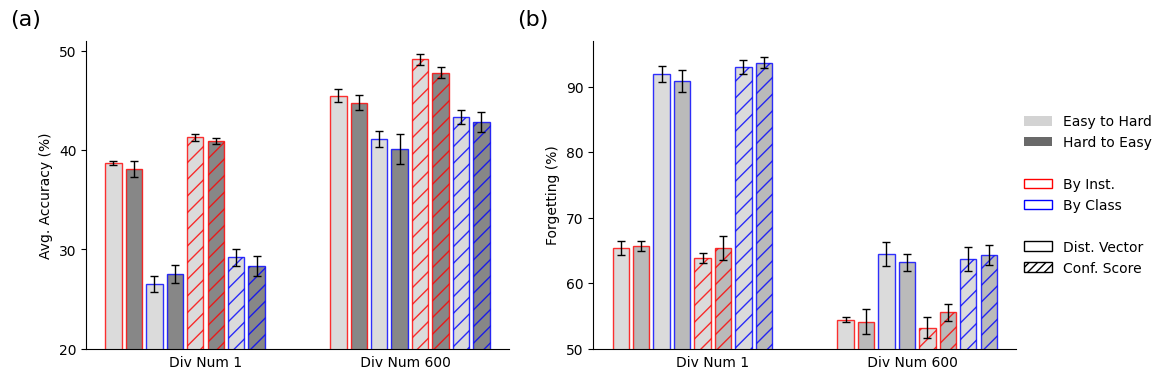

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

fig, (ax, ax1) = plt.subplots(1, 2, figsize=(12, 4), subplot_kw={'sharey': True})

# Convert the Series to a DataFrame
df = series_data.to_frame(name='Test Acc')

# Extract the common prefix before the seed
prefixes = []
for index in df.index:
    prefix = index.split('-seed')[0].strip()
    prefixes.append(prefix)

# Add the prefixes as a new column in the DataFrame
df['Prefix'] = prefixes

# with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):  # more options can be specified also
#     display(df)

# Extract unique prefixes
unique_prefixes = df['Prefix'].unique()

# Calculate mean and standard deviation for each unique prefix
mean_values = []
std_values = []
for prefix in unique_prefixes:
    values = df.loc[df['Prefix'] == prefix, 'Test Acc']
    mean_values.append(values.mean())
    std_values.append(values.std())

# Add bars for divnum 1 prefixes
turning1 = 1
for i, prefix in enumerate(unique_prefixes):
    if "divnum600" in prefix and turning1:
        turning1 = 0
        ax.bar(" ", 0, color='white', linewidth=0)
        ax.bar("  ", 0, color='white', linewidth=0)
        ax.bar("   ", 0, color='white', linewidth=0)
        
    color = 'lightgrey' if 'hard2ez0' in prefix else 'dimgrey'
    # linewidth = 0.3 if 'pretrained1' in prefix else 1
    edgecolor = 'red' if 'byclass0' in prefix else 'blue'
    
    # bar = ax.bar(prefix, mean_values[i], yerr=std_values[i], alpha=0.8, color=color, edgecolor='black', linewidth=linewidth)
    error_kw = {'elinewidth': 1, 'capsize': 3, 'capthick': 1}
    bar = ax.bar(prefix, mean_values[i], yerr=std_values[i], alpha=0.8, color=color, edgecolor=edgecolor, linewidth=1, error_kw=error_kw)
    if 'pretrained1' in prefix:
        for rect in bar:
            rect.set_hatch('//')

# Set plot labels and title
ax.set_ylabel('Avg. Accuracy (%)')
ax.set_xlabel('Div Num 1                           Div Num 600')
ax.xaxis.set_label_coords(0.53, -0.02) 
# plt.title('Avg. Accuracy (%) Across Different Replay Sequences')

ax.set_xticks([])
ax.set_yticks([20,30,40,50])
ax.set_ylim(20, 51)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



# Add bars for divnum 1 prefixes
turning1 = 1
for i, prefix in enumerate(unique_prefixes):
    if "divnum600" in prefix and turning1:
        turning1 = 0
        ax1.bar(" ", 0, color='white', linewidth=0)
        ax1.bar("  ", 0, color='white', linewidth=0)
        ax1.bar("   ", 0, color='white', linewidth=0)
        
    color = 'lightgrey' if 'hard2ez0' in prefix else 'darkgrey'
    # linewidth = 0.3 if 'pretrained1' in prefix else 1
    edgecolor = 'red' if 'byclass0' in prefix else 'blue'
    error_kw = {'elinewidth': 1, 'capsize': 3, 'capthick': 1}
    bar = ax1.bar(prefix, mean_values1[i], yerr=std_values1[i], alpha=0.8, color=color, edgecolor=edgecolor, linewidth=1, error_kw=error_kw)
    if 'pretrained1' in prefix:
        for rect in bar:
            rect.set_hatch('//')

# Set plot labels and title
ax1.set_ylabel('Forgetting (%)')
ax1.set_xlabel('Div Num 1                           Div Num 600')
ax1.xaxis.set_label_coords(0.53, -0.02) 
# plt.title('Avg. Accuracy (%) Across Different Replay Sequences')

ax1.set_xticks([])
ax1.set_ylim(50, 97)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)



# Create custom legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, fc='lightgrey'),
    plt.Rectangle((0, 0), 1, 1, fc='dimgrey'),
    plt.Rectangle((0, 0), 1, 1, fc='white'),
    plt.Rectangle((0, 0), 1, 1, fc='white', ec='red', lw=1),
    plt.Rectangle((0, 0), 1, 1, fc='white', ec='blue', lw=1),
    plt.Rectangle((0, 0), 1, 1, fc='white'),
    plt.Rectangle((0, 0), 1, 1, fc='white', hatch='', ec='black', lw=1),
    plt.Rectangle((0, 0), 1, 1, fc='white', hatch='////', ec='black', lw=1)
]
legend_labels = ['Easy to Hard', 'Hard to Easy', "", 'By Inst.', 'By Class', '',  'Dist. Vector', 'Conf. Score']
ax1.legend(legend_elements, legend_labels, loc="center right",  bbox_to_anchor=(1.35, 0.5), ncol=1, frameon=False)


ax.text(-0.18, 1.05, '(a)', transform=ax.transAxes, fontsize=16)
ax1.text(-0.18, 1.05, '(b)', transform=ax1.transAxes, fontsize=16)

plt.savefig("varyreplayseqcifar100.pdf", bbox_inches='tight')

# remove bounding box of legend, move to top and make horizontal top or move it to general for both figure
# swap and standardise
# baseline no need 

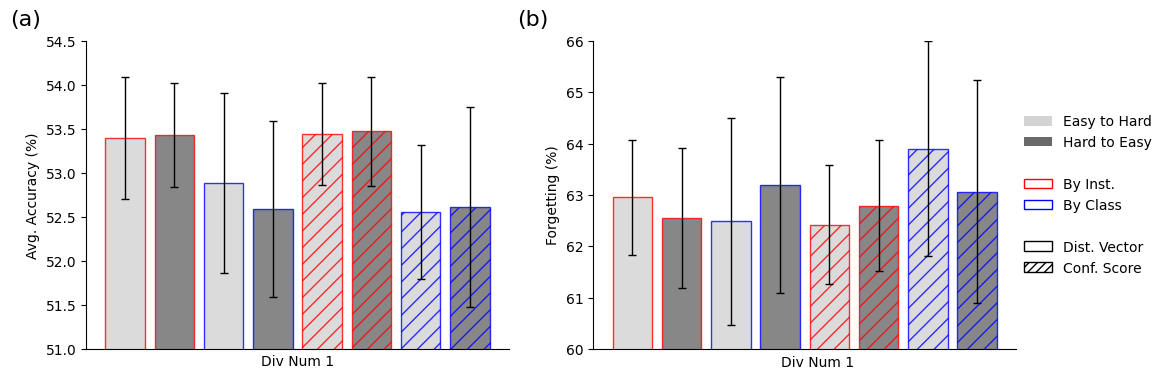

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

fig, (ax, ax1) = plt.subplots(1, 2, figsize=(12, 4), subplot_kw={'sharey': True})

ll = {'ClusterInstanceez2hard': (62.950233308956996, 1.1262773858625295), 
     'ClusterInstancehard2ez': (62.553384654952, 1.3673154899654287), 
     'Clusterez2hard': (62.48447698850475, 2.0213961716401574), 
     'Clusterhard2ez': (63.1863212098847, 2.105163259875771), 
     'Instanceez2hard': (62.421764398283806, 1.16275709876193),
     'Instancehard2ez': (62.78481737817623, 1.2763057942987202), 
     'ez2hard': (63.89501311528629, 2.0959972784696226),
     'hard2ez': (63.06374032790757, 2.1665091943230874)}

a = {'ClusterInstanceez2hard': (53.39738333333334, 0.6941318826187403), 
      'ClusterInstancehard2ez': (53.43224166666667, 0.5910702614922074), 
      'Clusterez2hard': (52.88695, 1.0256791276062012), 
      'Clusterhard2ez': (52.58858333333333, 1.0017176148119593), 
      'Instanceez2hard': (53.44105, 0.5824071346299231), 
      'Instancehard2ez': (53.47170833333333, 0.6194704489008371), 
      'ez2hard': (52.55596666666667, 0.7620271913461341), 
      'hard2ez': (52.614275, 1.1354076621564728)}

turning1 = 1
for prefix, v in a.items():  
    color = 'lightgrey' if 'ez2hard' in prefix else 'dimgrey'
    # linewidth = 0.3 if 'pretrained1' in prefix else 1
    edgecolor = 'red' if 'Instance' in prefix else 'blue'
    
    # bar = ax.bar(prefix, mean_values[i], yerr=std_values[i], alpha=0.8, color=color, edgecolor='black', linewidth=linewidth)
    error_kw = {'elinewidth': 1, 'capsize': 3, 'capthick': 1}
    bar = ax.bar(prefix, v[0], yerr=v[1], alpha=0.8, color=color, edgecolor=edgecolor, linewidth=1, error_kw=error_kw)
    if 'Cluster' not in prefix:
        for rect in bar:
            rect.set_hatch('//')

# Set plot labels and title
ax.set_ylabel('Avg. Accuracy (%)')
ax.set_xlabel('Div Num 1')

ax.set_xticks([])
ax.set_ylim(51, 54.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


mean_values1 = []
std_values1 = []
    
turning1 = 1
for prefix, v in ll.items():        
    color = 'lightgrey' if 'ez2hard' in prefix else 'dimgrey'
    # linewidth = 0.3 if 'pretrained1' in prefix else 1
    edgecolor = 'red' if 'Instance' in prefix else 'blue'
    
    # bar = ax.bar(prefix, mean_values[i], yerr=std_values[i], alpha=0.8, color=color, edgecolor='black', linewidth=linewidth)
    error_kw = {'elinewidth': 1, 'capsize': 3, 'capthick': 1}
    bar = ax1.bar(prefix, v[0], yerr=v[1], alpha=0.8, color=color, edgecolor=edgecolor, linewidth=1, error_kw=error_kw)
    if 'Cluster' not in prefix:
        for rect in bar:
            rect.set_hatch('//')

# Set plot labels and title
ax1.set_ylabel('Forgetting (%)')
ax1.set_xlabel('Div Num 1')
ax1.set_yticks(list(range(60, 67)))
ax1.xaxis.set_label_coords(0.53, -0.02) 
# plt.title('Avg. Accuracy (%) Across Different Replay Sequences')

ax1.set_xticks([])
ax1.set_ylim(60, 66)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)



# Create custom legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, fc='lightgrey'),
    plt.Rectangle((0, 0), 1, 1, fc='dimgrey'),
    plt.Rectangle((0, 0), 1, 1, fc='white'),
    plt.Rectangle((0, 0), 1, 1, fc='white', ec='red', lw=1),
    plt.Rectangle((0, 0), 1, 1, fc='white', ec='blue', lw=1),
    plt.Rectangle((0, 0), 1, 1, fc='white'),
    plt.Rectangle((0, 0), 1, 1, fc='white', hatch='', ec='black', lw=1),
    plt.Rectangle((0, 0), 1, 1, fc='white', hatch='////', ec='black', lw=1)
]
legend_labels = ['Easy to Hard', 'Hard to Easy', "", 'By Inst.', 'By Class', '',  'Dist. Vector', 'Conf. Score']
ax1.legend(legend_elements, legend_labels, loc="center right",  bbox_to_anchor=(1.35, 0.5), ncol=1, frameon=False)



ax.text(-0.18, 1.05, '(a)', transform=ax.transAxes, fontsize=16)
ax1.text(-0.18, 1.05, '(b)', transform=ax1.transAxes, fontsize=16)

plt.savefig("varyreplayseqcifar10.pdf", bbox_inches='tight')

# remove bounding box of legend, move to top and make horizontal top or move it to general for both figure
# swap and standardise
# baseline no need 